In [3]:
import pandas as pd
import numpy as np

# Parameters
num_sensors = 10
start_time = pd.Timestamp('2025-07-01 01:00:00', tz='UTC')
end_time = pd.Timestamp('2025-07-01 02:00:00', tz='UTC')
timestamps = pd.date_range(start=start_time, end=end_time, freq='1min')

# Generate data
data = []
for sensor_id in range(1, num_sensors + 1):
  temp = np.random.normal(loc=22, scale=2, size=len(timestamps))  # Celsius
  humidity = np.random.uniform(low=30, high=70, size=len(timestamps))  # %
  pressure = np.random.normal(loc=1013, scale=5, size=len(timestamps))  # mbar
  for i, ts in enumerate(timestamps):
    data.append({
      'sensor_id': sensor_id,
      'timestamp': ts,
      'temperature_c': round(temp[i], 2),
      'relative_humidity': round(humidity[i], 2),
      'pressure_mbar': round(pressure[i], 2)
    })

sensor_df = pd.DataFrame(data)

In [4]:
sample = sensor_df.sample(n=100, random_state=42)
sample.to_csv('sample.csv', index=False)

In [5]:
print(sample.head())

     sensor_id                 timestamp  temperature_c  relative_humidity  \
81           2 2025-07-01 01:20:00+00:00          24.01              49.08   
218          4 2025-07-01 01:35:00+00:00          21.91              48.31   
55           1 2025-07-01 01:55:00+00:00          23.41              63.28   
598         10 2025-07-01 01:49:00+00:00          21.44              66.46   
264          5 2025-07-01 01:20:00+00:00          22.51              47.31   

     pressure_mbar  
81         1004.07  
218        1009.62  
55         1014.50  
598        1014.70  
264        1020.18  


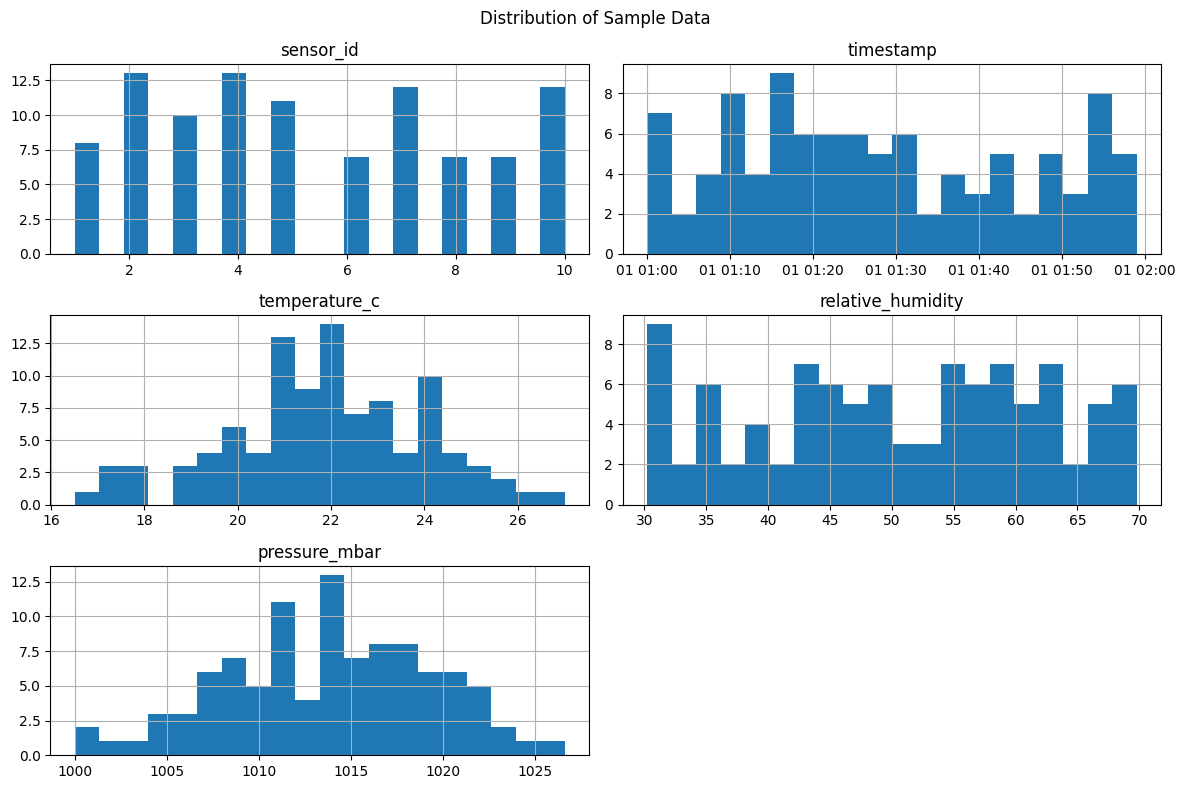

In [6]:
import matplotlib.pyplot as plt

sample.hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Sample Data')
plt.tight_layout()
plt.show()